参考：http://go2coding.com/blog/show/260

In [1]:
from __future__ import absolute_import, division, print_function  
import tensorflow as tf  
import numpy as np  
rng = np.random 

In [2]:
# Hyper paramemters
learning_rate = 0.01  
training_steps = 1000  
display_step = 50

In [3]:
# training data
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,  
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])  
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,  
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])  
n_samples = X.shape[0]  

In [4]:
# 随机初始化权重，偏置  
W = tf.Variable(rng.randn(),name="weight")  
b = tf.Variable(rng.randn(),name="bias")  

In [5]:
# 线性回归(Wx+b)  
def linear_regression(x):  
    return W * x + b  

In [6]:
# 均方差  
def mean_square(y_pred,y_true):  
    return tf.reduce_sum(tf.pow(y_pred-y_true,2)) / (2 * n_samples)  

In [7]:
# 随机梯度下降优化器  
optimizer = tf.optimizers.SGD(learning_rate)  

In [8]:
# 优化过程  
def run_optimization():  
    # 将计算封装在GradientTape中以实现自动微分  
    with tf.GradientTape() as g:  
        pred = linear_regression(X)  
        loss = mean_square(pred,Y)  

    # 计算梯度  
    gradients = g.gradient(loss,[W,b])  

    # 按gradients更新 W 和 b  
    optimizer.apply_gradients(zip(gradients,[W,b]))  

In [9]:
# 针对给定训练步骤数开始训练  
for step in range(1,training_steps + 1):  
    # 运行优化以更新W和b值  
    run_optimization()  

    if step % display_step == 0:  
        pred = linear_regression(X)  
        loss = mean_square(pred, Y)  
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))  

step: 50, loss: 0.089860, W: 0.316104, b: 0.341745
step: 100, loss: 0.088381, W: 0.312305, b: 0.368675
step: 150, loss: 0.087071, W: 0.308731, b: 0.394019
step: 200, loss: 0.085911, W: 0.305366, b: 0.417869
step: 250, loss: 0.084884, W: 0.302201, b: 0.440314
step: 300, loss: 0.083974, W: 0.299221, b: 0.461436
step: 350, loss: 0.083168, W: 0.296417, b: 0.481314
step: 400, loss: 0.082455, W: 0.293779, b: 0.500021
step: 450, loss: 0.081823, W: 0.291296, b: 0.517625
step: 500, loss: 0.081263, W: 0.288959, b: 0.534193
step: 550, loss: 0.080767, W: 0.286760, b: 0.549784
step: 600, loss: 0.080328, W: 0.284690, b: 0.564456
step: 650, loss: 0.079939, W: 0.282742, b: 0.578264
step: 700, loss: 0.079595, W: 0.280909, b: 0.591258
step: 750, loss: 0.079290, W: 0.279185, b: 0.603487
step: 800, loss: 0.079020, W: 0.277561, b: 0.614995
step: 850, loss: 0.078781, W: 0.276034, b: 0.625825
step: 900, loss: 0.078569, W: 0.274596, b: 0.636017
step: 950, loss: 0.078382, W: 0.273243, b: 0.645608
step: 1000, l

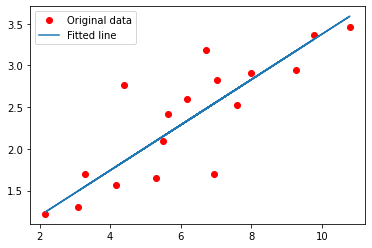

In [10]:
import matplotlib.pyplot as plt  

# 绘制图  
plt.plot(X, Y, 'ro', label='Original data')  
plt.plot(X, np.array(W * X + b), label='Fitted line')  
plt.legend()  
plt.show()  